# Bike Sharing Demand

## 시간당 자전거 대여량을 예측하기

## 프로젝트 시작일: 10/05/2021 ~


## 컬럼 설명

(데이터 다운로드: https://www.kaggle.com/c/bike-sharing-demand/data)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다.(ex. 2018-11-01 00:00:00) 
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

## 패키지 불러오기

In [1]:
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
# train.csv 파일 읽어오기
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# teste.csv 파일 읽어오기
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Preprocessing

datetime(날짜) 컬럼 전처리하기

In [5]:
# 판다스의 to_datetime을 활용해 datetime 컬럼의 타입을 문자열(String)에서 날짜/시간(datetime) 데이터로 바꿔주기
train['datetime'] = pd.to_datetime(train['datetime'])

# train 데이터에 연, 월, 일, 시를 나타내는 새로운 컬럼을 생성하기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

print(train.shape)
train.head()

(10886, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [6]:
# test 데이터도 train 데이터와 마찬가지로 datetime 데이터로 바꿔주기
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

print(test.shape)
test.head()

(6493, 13)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


## EDA 

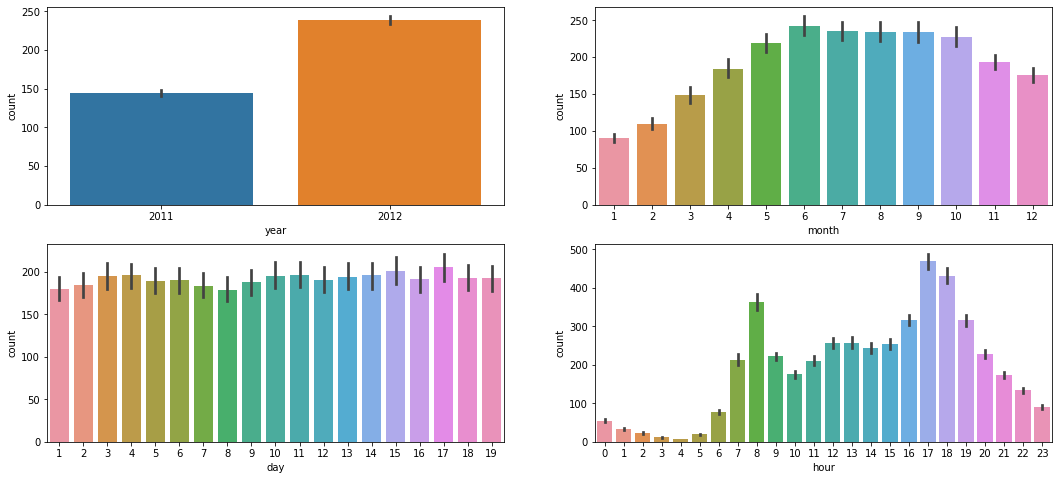

In [12]:
# matplotlib의 subplots를 사용하여 한 화면으로 띄우기
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에 연, 월, 일, 시 자전거 대여량 출력
sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)

plt.show()

### 시각화로 발견할 수 있는 사실
- year: 2011년도의 자전거 대여량보다 2012년도의 자전거 대여량이 더 높다는 점
- month :주로 여름(6월~8월)에 자전거를 많이 빌림. 같은 겨울이라도 12월의 자전거 대여량이 1월의 대여량보다 두배정도 많음 
- day : 1~19일까지 밖에 없음
- hour : 오후 시간대 자전거를 많이 빌림, 출퇴근 시간대 자전거를 많이 빌림 


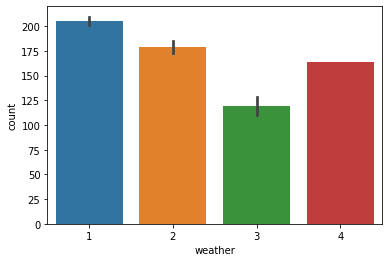

In [13]:
# weather 데이터 시각화하여 자전거 대여량 확인해보기
sns.barplot(data=train, x='weather', y='count')
plt.show()

### 시각화로 발견할 수 있는 사실
날씨(weather)가 안 좋을수록 자전거 대여량이 낮아지는 현상을 발견할 수 있었지만, 3보다 4가 더 많다는 사실 알 수 있음

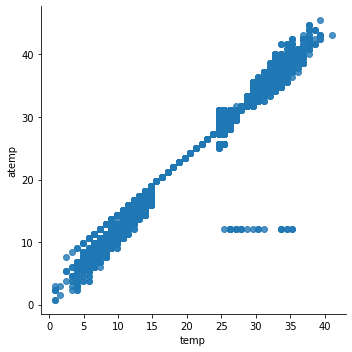

In [24]:
# seaborn의 lmplot으로 temp(온도)와 atemp(체감온도)의 상관관계를 시각화
sns.lmplot(data=train, x='temp', y='atemp', fit_reg=False)
plt.show()

In [25]:
# temp 종류 출력 -> 생각보다 종류가 많지 않음
train['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [26]:
# atemp 종류 출력 -> 생각보다 종류가 많지 않음
train['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

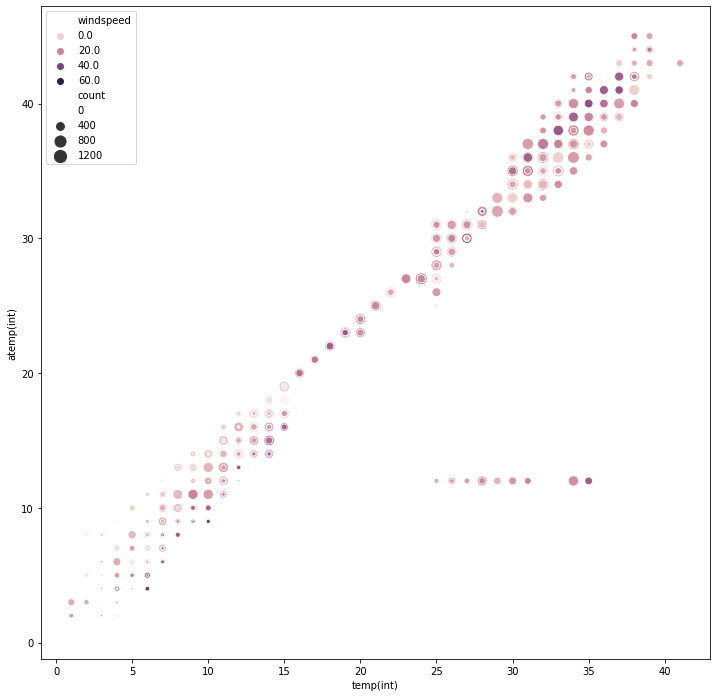

In [31]:
# temp(온도)와 atemp(체감온도)는 반올림
# 각각 temp(int)와 atemp(int)라는 이름의 새로운 컬럼에 할당
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

# matplotlib를 활용
plt.figure(figsize = (12, 12))

# scatterplot을 활용해 temp(온도, atemp(체감온도),
# 그리고 windspeed(풍속)과 count(자전거 대여량)간의 상관관계를 시각화
sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count", sizes=(0, 150))
plt.show()

In [34]:
# 정수형(int)으로 변환한 temp(온도)와 atemp(체감온도)를 빼서
# 두 값의 차이를 나타내는 temp(difference)라는 새로운 컬럼을 추가
train['temp(difference)'] = train['temp(int)'] - train['atemp(int)']

train[['temp(int)', 'atemp(int)', 'temp(difference)']]

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0
...,...,...,...
10881,16.0,20.0,-4.0
10882,15.0,17.0,-2.0
10883,14.0,16.0,-2.0
10884,14.0,17.0,-3.0


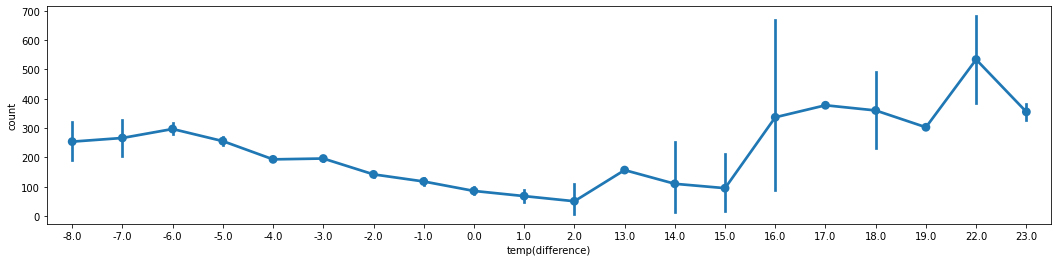

In [36]:
plt.figure(figsize = (18, 4))

# seaborn의 point으로 temp(difference)에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="temp(difference)", y="count")
plt.show()

In [37]:
train['temp(difference)'].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

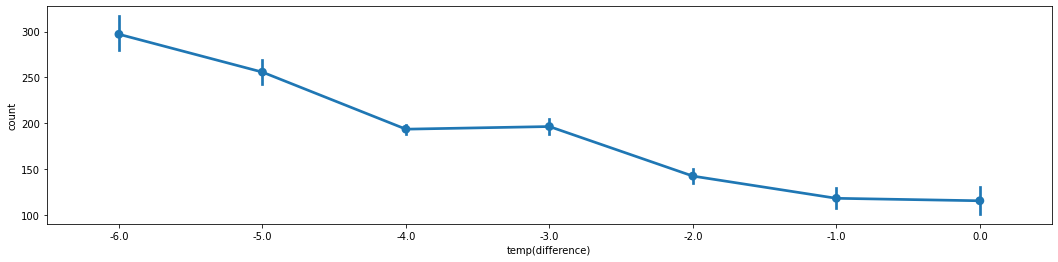

In [44]:
# temp(difference)가 -6보다 작은 데이터는 -6으로 통일
train.loc[train['temp(difference)'] < -6, 'temp(difference)'] = 6

# 비슷하게, temp(difference)가 0보다 큰 데이터는 0으로 통일
train.loc[train['temp(difference)'] > 0, 'temp(difference)'] = 0

# matplotlib를 활용
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 temp(difference)에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="temp(difference)", y="count")
plt.show()

### 시각화로 발견할 수 있는 사실
- temp,atemp는 서로 상관관계가 높음
- temp나 atemp가 낮을수록 자전거를 덜 빌리고, 높을수록 자전거를 많이 빌림
- atemp가 temp보다 높을 경우 자전거를 더 많이 빌림

In [48]:
# train 데이터에 요일을 나타내는 새로운 컬럼을 생성
train['dayofweek'] = train['datetime'].dt.day_name()

print(train.shape)
train[["datetime", "dayofweek"]]

(10886, 20)


,datetime,dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday
...,...,...
10881,2012-12-19 19:00:00,Wednesday
10882,2012-12-19 20:00:00,Wednesday
10883,2012-12-19 21:00:00,Wednesday
10884,2012-12-19 22:00:00,Wednesday


In [51]:
test['dayofweek'] = test['datetime'].dt.day_name()

print(test.shape)
test[["datetime", "dayofweek"]]

(6493, 14)


,datetime,dayofweek
0,2011-01-20 00:00:00,Thursday
1,2011-01-20 01:00:00,Thursday
2,2011-01-20 02:00:00,Thursday
3,2011-01-20 03:00:00,Thursday
4,2011-01-20 04:00:00,Thursday
...,...,...
6488,2012-12-31 19:00:00,Monday
6489,2012-12-31 20:00:00,Monday
6490,2012-12-31 21:00:00,Monday
6491,2012-12-31 22:00:00,Monday


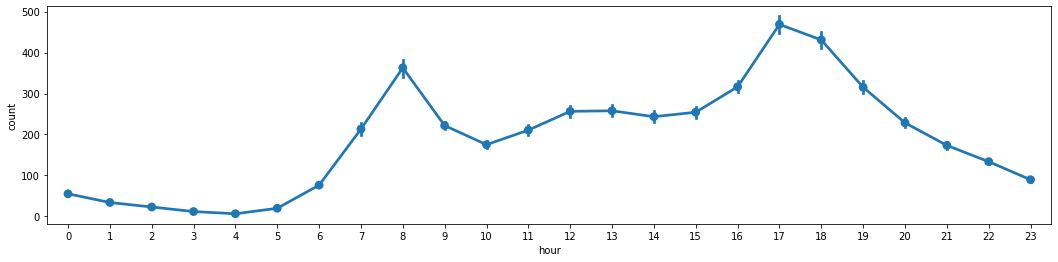

In [53]:
# matplotlib를 활용
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 hour(시간)에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="hour", y="count")
plt.show()

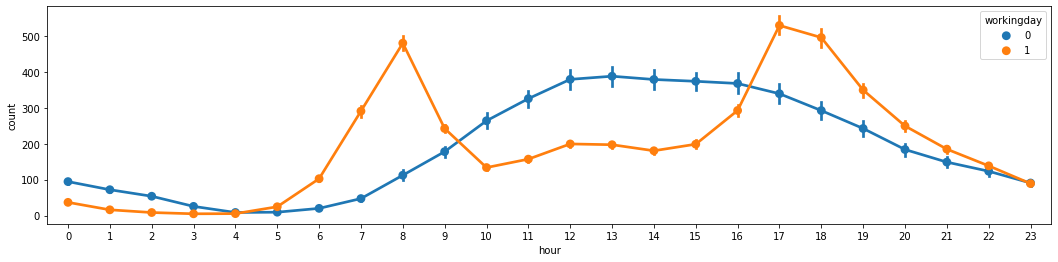

In [55]:
# matplotlib를 활용
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 workingday(근무일 여부)와 hour(시간)에 따른 자전거 변화량을 시각화
# 확실히 근무하는 날과 근무하지 않는 날의 자전거 대여량이 명확하게 차이가 남
sns.pointplot(data=train, x='hour', y='count', hue='workingday')
plt.show()

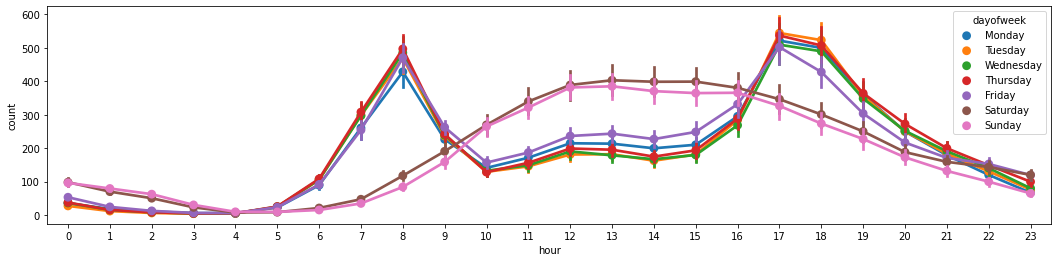

In [57]:
# matplotlib를 활용
plt.figure(figsize = (18, 4))

# 월~일까지의 요일 순서 지정
# dayofweek_order라는 이름의 변수에 할당
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# seaborn의 pointplot으로 dayofweek(요일)과 hour(시간))에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", hue_order=dayofweek_order)
plt.show()

### 시각화로 발견할 수 있는 사실
- 같은 주말이라고 하더라도 일요일이 토요일보다 자전거 대여량이 낮음 -> 일요일은 다음날이 월요일이기 때문에?
- 같은 주중이라도 금요일이 퇴근하는 시간대(18시 ~ 20시)에 자전거 대여량이 다른 주중에 비해 낮음 -> 불금을 즐기기 위해?
- 금요일은 같은 주중이라고 하더라도 오후 시간대(10시 ~ 16시)에 자전거 대여량이 높음 -> 금요일과 월요일은 주중임에도 불구하고 주말과 끼여있는 요일이기 때문에, 주말의 성향을 어느정도 타는게 아닐까?

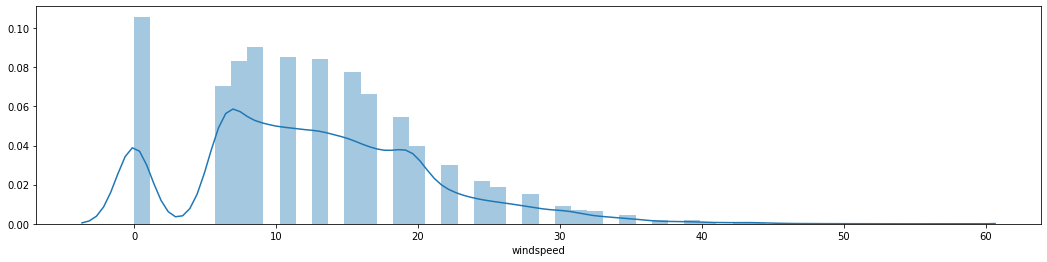

In [14]:
# matplotlib를 활용
plt.figure(figsize = (18, 4))

# seaborn의 distplot으로 windspeed(풍속) 데이터를 시각화
sns.distplot(train["windspeed"])
plt.show()

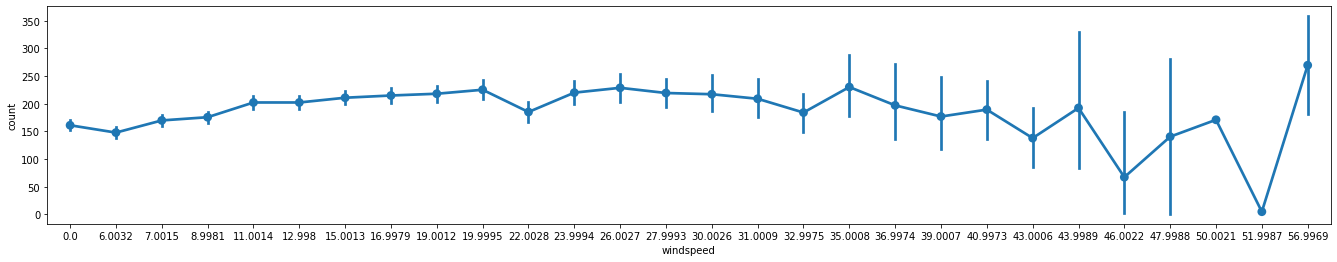

In [17]:
# matplotlib를 활용
plt.figure(figsize = (23, 4))

# # seaborn의 pointplot으로 windspeed(풍속)에 따른 자전거 대여량의 변화 시각화
sns.pointplot(data=train, x='windspeed', y='count')
plt.show()

### 시각화로 발견할 수 있는 사실
- 풍속이 0인 경우가 굉장히 많음
- 풍속이 과하게 높을수록 자전거를 덜 빌리는 현상이 보이는 것 같은데, 뭔가 신뢰도가 높지 않음. 풍속이 낮을 경우에 전반적으로 자전거 대여량이 낮음(보통 풍속이 낮으면 자전거 대여량이 높을 것 같은데?)